In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals
%matplotlib inline
import caffe2
import numpy as np
import skimage.io
import skimage.transform
from matplotlib import pyplot
import os
from caffe2.python import core, workspace, models
# import urllib2
import operator
print("Required modules imported.")


DIR = "./LittlePlaNet/models/squeezenet//"
IMAGE_LOCATION = "./LittlePlaNet/data/cities/"

INPUT_IMAGE_SIZE = 227

Required modules imported.


In [2]:
imgs_m = os.listdir(IMAGE_LOCATION+"Moscow/")[:100]
imgs_b = os.listdir(IMAGE_LOCATION+"Barcelona/")[:100]
# Function to crop the center cropX x cropY pixels from the input image
def crop_center(img,cropx,cropy):
    y,x,c = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

# Function to rescale the input image to the desired height and/or width. This function will preserve
#   the aspect ratio of the original image while making the image the correct scale so we can retrieve
#   a good center crop. This function is best used with center crop to resize any size input images into
#   specific sized images that our model can use.
def rescale(img, input_height, input_width):
    # Get original aspect ratio
    aspect = img.shape[1]/float(img.shape[0])
    if(aspect>1):
        # landscape orientation - wide image
        res = int(aspect * input_height)
        imgScaled = skimage.transform.resize(img, (input_width, res))
    if(aspect<1):
        # portrait orientation - tall image
        res = int(input_width/aspect)
        imgScaled = skimage.transform.resize(img, (res, input_height))
    if(aspect == 1):
        imgScaled = skimage.transform.resize(img, (input_width, input_height))
    return imgScaled


In [5]:
MEANFILE = "./LittlePlaNet/data/cities/mean_image.binaryproto"
# data = open(MEANFILE, 'rb').read()

# blob = caffe.proto.caffe_pb2.BlobProto()
# blob.ParseFromString(data)
# data = np.array(blob.data)

with open(DIR+"init_net.pb", 'rb') as f:
    init_net = f.read()
with open(DIR+"predict_net.pb",'rb') as f:
    predict_net = f.read()    

Image Shape after rescaling:  (227, 227, 3)
Image Shape after cropping:  (227, 227, 3)
CHW Image Shape:  (3, 227, 227)


/home/ashedko/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


669

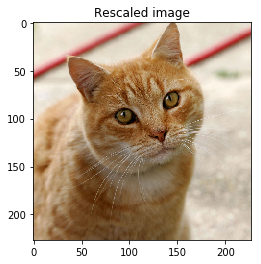

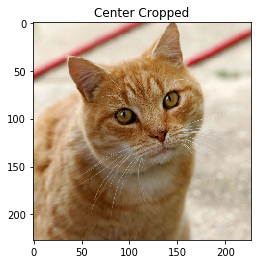

In [6]:
# img = skimage.img_as_float(skimage.io.imread(IMAGE_LOCATION+"Moscow/"+imgs_m[1])).astype(np.float32)
img = skimage.img_as_float(skimage.io.imread("./Cat2.jpg"))
img = rescale(img, INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE)
print("Image Shape after rescaling: " , img.shape)
pyplot.figure()
pyplot.imshow(img)
pyplot.title('Rescaled image')

# Crop the center 227x227 pixels of the image so we can feed it to our model
img = crop_center(img, INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE)
print("Image Shape after cropping: " , img.shape)
pyplot.figure()
pyplot.imshow(img)
pyplot.title('Center Cropped')

# switch to CHW (HWC --> CHW)
img = img.swapaxes(1, 2).swapaxes(0, 1)
print("CHW Image Shape: " , img.shape)

img = img[np.newaxis, :, :, :].astype(np.float32)
p = workspace.Predictor(init_net, predict_net)
img -= img.mean() 
results = p.run({"data":img})
results[0].argmax()

<module 'caffe2' from '/home/ashedko/anaconda3/lib/python3.6/site-packages/caffe2/__init__.py'>

669

NameError: name 'p' is not defined